In [1]:
!unzip "/content/Flowers-Dataset.zip"

Archive:  /content/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg 

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [3]:

batch_size = 16

In [4]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [5]:
train_data_set = tf.keras.utils.image_dataset_from_directory(
  "flowers",
  validation_split=0.25,
  subset="training",
  seed=132,
  image_size=(180, 180),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3238 files for training.


In [6]:
val_data_set = tf.keras.utils.image_dataset_from_directory(
  "flowers",
  validation_split=0.25,
  subset="validation",
  seed=132,
  image_size=(180, 180),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 1079 files for validation.


In [7]:
class_names = train_data_set.class_names

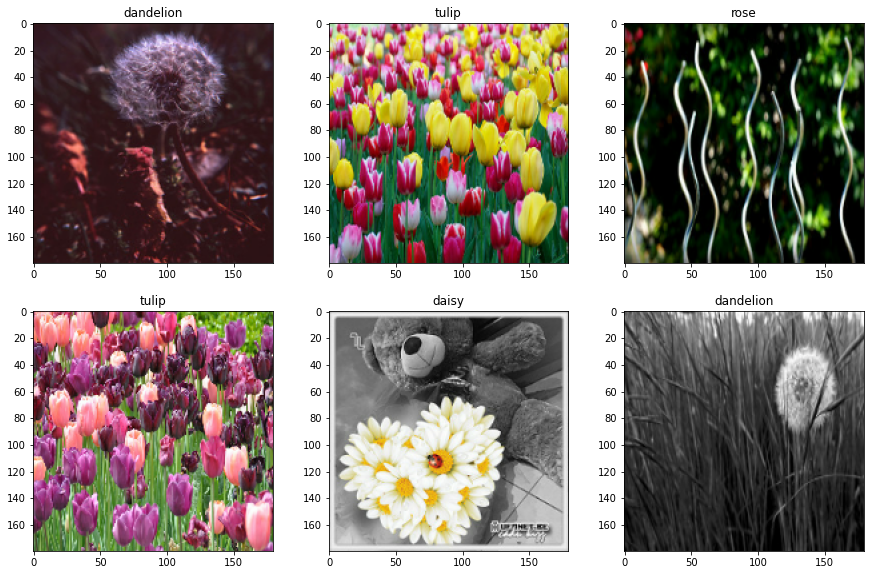

In [8]:
plt.figure(figsize=(15, 15))
for images, labels in train_data_set.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [9]:
normalization_layer = layers.Rescaling(1./255)

In [10]:
dataset_normalized = train_data_set.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(dataset_normalized))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [11]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  # adding convolutional layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  # adding maxpooling layer
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # adding flatten
  layers.Flatten(),
  # adding dense hidden layer
  layers.Dense(128, activation='relu'),
  # adding dense output layer
  layers.Dense(num_classes)
])

In [12]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [13]:
epochs=15
history = model.fit(train_data_set,validation_data=val_data_set,epochs=epochs)

Epoch 1/15
203/203 [==============================] - 141s 685ms/step - loss: 1.1972 - accuracy: 0.4917 - val_loss: 1.2477 - val_accuracy: 0.5190
Epoch 2/15
203/203 [==============================] - 138s 677ms/step - loss: 0.9808 - accuracy: 0.6149 - val_loss: 1.1068 - val_accuracy: 0.6117
Epoch 3/15
203/203 [==============================] - 138s 681ms/step - loss: 0.8657 - accuracy: 0.6612 - val_loss: 1.0273 - val_accuracy: 0.6247
Epoch 4/15
203/203 [==============================] - 139s 683ms/step - loss: 0.8291 - accuracy: 0.6739 - val_loss: 0.9268 - val_accuracy: 0.6738
Epoch 5/15
203/203 [==============================] - 139s 682ms/step - loss: 0.7732 - accuracy: 0.7106 - val_loss: 0.8851 - val_accuracy: 0.6830
Epoch 6/15
203/203 [==============================] - 139s 684ms/step - loss: 0.7180 - accuracy: 0.7254 - val_loss: 0.8380 - val_accuracy: 0.6830
Epoch 7/15
203/203 [==============================] - 139s 685ms/step - loss: 0.7051 - accuracy: 0.7282 - val_loss: 0.9346 -

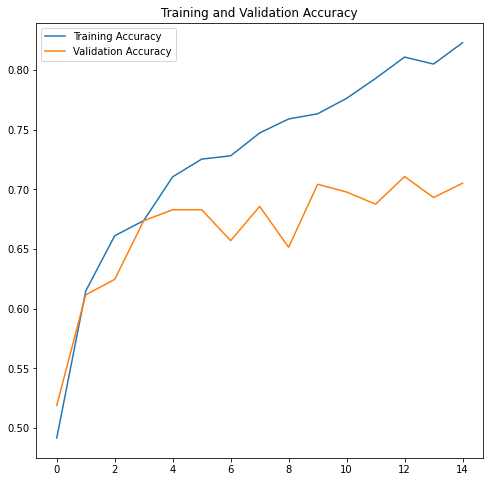

In [14]:
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

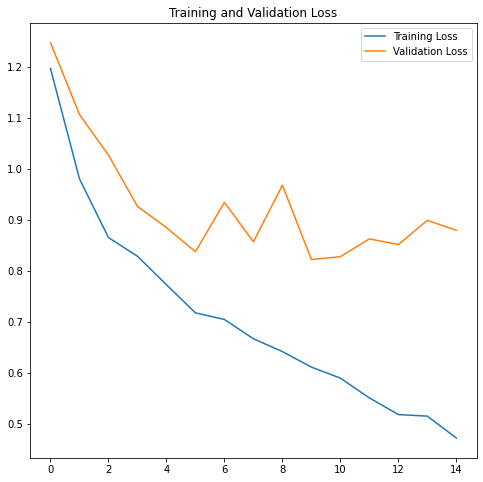

In [15]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [16]:
model.save("CNN Model for Classification Of Flowers.h5")

In [17]:
model.load_weights('CNN Model for Classification Of Flowers.h5')

In [18]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(class_names[np.argmax(score)],100 * np.max(score))

1/1 [==============================] - 0s 322ms/step
sunflower 99.77391958236694
